                           Количество пропусков
делали ли операцию                            1
возраст                                       0
ректальная температура                       60
пульс                                        24
частота дыхания                              58
вздутие живота                               56
исход                                         1
хирургическое повреждение                     0
       ректальная температура       пульс  частота дыхания
count              243.000000  243.000000       243.000000
mean                38.176907   72.286813        30.144849
std                  0.648443   26.934350        15.051278
min                 36.100000   36.000000         8.000000
25%                 37.850000   50.000000        20.000000
50%                 38.167917   68.000000        30.000000
75%                 38.500000   88.000000        35.500000
max                 40.800000  184.000000        90.000000
 Нормальная температура лошади 37.8 С

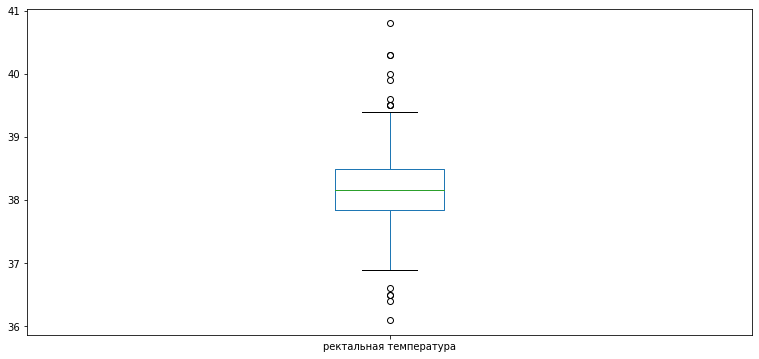

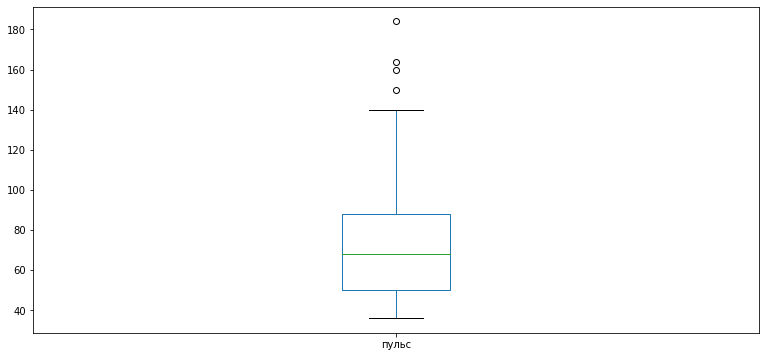

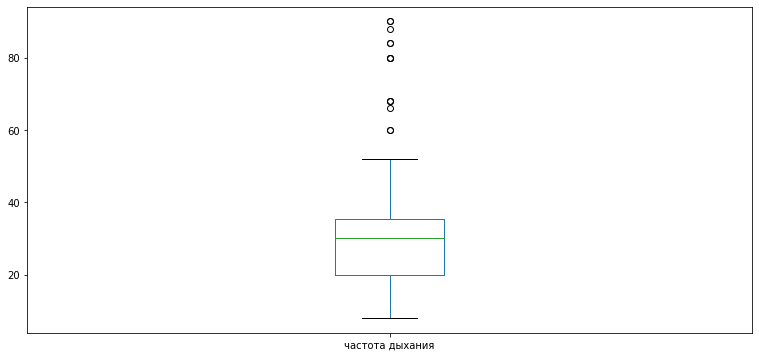

Значения выбросов ректальной температуры, частоты дыхания и пульса являются реальными, поэтому их не удаляем.
делали ли операцию  исход      
да                  был усыплен    11.971831
                    жил            55.633803
                    умер           32.394366
dtype: float64
делали ли операцию  исход      
нет                 был усыплен    15.841584
                    жил            67.326733
                    умер           16.831683
dtype: float64
Смертность после операции составляет 44 процента


In [129]:
import requests
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

response = requests.get('https://raw.githubusercontent.com/obulygin/pyda_homeworks/master/statistics_basics/horse_data.csv')
reec = re.split(r'\n', response.text)
list_rec = []

for rec in reec:
    list_rec.append(re.split(r',', rec))
df = pd.DataFrame(list_rec)

# дадим названия столбцам
df.columns= ["делали ли операцию","возраст","Hospital Number","ректальная температура","пульс","частота дыхания",
             "temperature_of_extremities","peripheral pulse","mucous membranes","capillary refill time","pain","peristalsis",
             "вздутие живота","nasogastric tube","nasogastric reflux","nasogastric reflux PH",
             "rectal examination","abdomen","packed cell volume","total protein","abdominocentesis appearance",
             "abdomcentesis total protein","исход","хирургическое повреждение","5","6","7","8"]

# выберем 8 столбцов
df = df[["делали ли операцию","возраст","ректальная температура","пульс", "частота дыхания","вздутие живота","исход",
         "хирургическое повреждение"]]
df=df.replace('?', np.NaN)
df= df.astype('float64')

def replace_(datafr,**kwargs):
    for key, val in kwargs.items():
        if datafr in kwargs[key].keys():
            return kwargs[key][datafr]
    return np.NaN


df["делали ли операцию"] = df["делали ли операцию"].apply(replace_, kwargs= {1:"да", 2:"нет"})
df["исход"] = df["исход"].apply(replace_, kwargs= {1:"жил", 2:"умер", 3:"был усыплен"}) 
df["хирургическое повреждение"] = df["хирургическое повреждение"].apply(replace_, kwargs= {1:"да", 2:"нет"}) 
df["вздутие живота"] = df["вздутие живота"].apply(replace_, kwargs= {1:"нет", 2:"незначительно",3: "умеренный",4: "тяжелый"}) 
df["возраст"] = df["возраст"].apply(replace_, kwargs= {1:"взрослая", 9:"меньше 6 месяцев"})

# Посчитаем количесвто пропусков в каждом столбце
number_NaN = len(df) - df.count()
number_NaN = number_NaN.to_frame()
number_NaN.columns = ["Количество пропусков"]
print(number_NaN)

# Заменим пропуски в столбцах (ректальная температура, пульс и чаcтота дыхания) их средними значениями
df["ректальная температура"].fillna(df["ректальная температура"].mean(), inplace = True)
df["пульс"].fillna(df["пульс"].mean(), inplace = True)
df["частота дыхания"].fillna(df["частота дыхания"].mean(), inplace = True)

# в столбце вздутие живота 56 пропусков, удалим строки с этими пропусками
# также удалим строки с пропусками в остальных столбцах
df = df.dropna()

# посчитаем базовые метрики для числовых данных (ректальная температура, пульс и чаcтота дыхания)
print(df.describe())
# Сравним среднюю ректальную температуру с нормальной температурой 
print(" Нормальная температура лошади 37.8 С\n",
      "Средняя ректальная температура выше нормы на", (df["ректальная температура"].mean()-37.8), "градусов\n",
      "25% процентов лошадей имеют температуру ниже нормального")

# Нарисуем графики box для ректальной температуры, пульса и чаcтоты дыхания
df["ректальная температура"].plot(kind='box')
plt.show()

df["пульс"].plot(kind='box')
plt.show()

df["частота дыхания"].plot(kind='box')
plt.show()

print("Значения выбросов ректальной температуры, частоты дыхания и пульса являются реальными, поэтому их не удаляем.")

df_with_op = df[df["делали ли операцию"] == "да"]

df_without = df[df["делали ли операцию"] == "нет"]

# Проверим какой исход был после операции
print(df_with_op.groupby(["делали ли операцию", "исход"]).size() / len(df_with_op)*100)
print(df_without.groupby(["делали ли операцию", "исход"]).size() / len(df_without)*100)
print('Смертность после операции составляет 44 процента')